# Monitoring and alerting

## Detecting behavior example

### Importing and combining the datasets

In [1]:
import pandas as pd

In [2]:
mobility_df = pd.read_csv(
    "Region_Mobility_Report_CSVs/" \
    "2020_GB_Region_Mobility_Report.csv")
print(mobility_df)

       country_region_code  country_region sub_region_1 sub_region_2  \
0                       GB  United Kingdom          NaN          NaN   
1                       GB  United Kingdom          NaN          NaN   
2                       GB  United Kingdom          NaN          NaN   
3                       GB  United Kingdom          NaN          NaN   
4                       GB  United Kingdom          NaN          NaN   
...                    ...             ...          ...          ...   
133377                  GB  United Kingdom         York          NaN   
133378                  GB  United Kingdom         York          NaN   
133379                  GB  United Kingdom         York          NaN   
133380                  GB  United Kingdom         York          NaN   
133381                  GB  United Kingdom         York          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
0              NaN             NaN               NaN   
1              NaN     

In [3]:
mobility_df.drop(['country_region_code',
                  'country_region',
                  'sub_region_1',
                  'sub_region_2',
                  'metro_area',
                  'iso_3166_2_code',
                  'census_fips_code',
                  'place_id'],
                 axis='columns',
                 inplace=True)
mobility_df['date'] = pd.to_datetime(mobility_df['date'])
mobility_df.rename(columns={
    'retail_and_recreation_percent_change_from_baseline':
    'retail_and_recreation'}, 
                   inplace=True)
mobility_df.rename(columns={
    'grocery_and_pharmacy_percent_change_from_baseline':
    'grocery_and_pharmacy'}, 
                   inplace=True)
mobility_df.rename(columns={
    'parks_percent_change_from_baseline':
    'parks'}, 
                   inplace=True)
mobility_df.rename(columns={
    'transit_stations_percent_change_from_baseline':
    'transit'}, 
                   inplace=True)
mobility_df.rename(columns={
    'workplaces_percent_change_from_baseline':
    'workplaces'}, 
                   inplace=True)
mobility_df.rename(columns={
    'residential_percent_change_from_baseline':
    'residential'}, 
                   inplace=True)
mobility_df = mobility_df.head(321)
print(mobility_df)

          date  retail_and_recreation  grocery_and_pharmacy  parks  transit  \
0   2020-02-15                  -12.0                  -7.0  -35.0    -12.0   
1   2020-02-16                   -7.0                  -6.0  -28.0     -7.0   
2   2020-02-17                   10.0                   1.0   24.0     -2.0   
3   2020-02-18                    7.0                  -1.0   20.0     -3.0   
4   2020-02-19                    6.0                  -2.0    8.0     -4.0   
..         ...                    ...                   ...    ...      ...   
316 2020-12-27                  -58.0                 -24.0    3.0    -59.0   
317 2020-12-28                  -51.0                 -24.0   16.0    -70.0   
318 2020-12-29                  -47.0                 -11.0   14.0    -64.0   
319 2020-12-30                  -42.0                  -3.0   18.0    -63.0   
320 2020-12-31                  -53.0                   2.0   14.0    -67.0   

     workplaces  residential  
0          -4.0     

In [4]:
covid_df = pd.read_csv('overview_2022-09-22.csv')
print(covid_df)

      areaCode        areaName  areaType        date  hospitalCases  \
0    K02000001  United Kingdom  overview  2022-09-15         5729.0   
1    K02000001  United Kingdom  overview  2022-09-14         5705.0   
2    K02000001  United Kingdom  overview  2022-09-13         5792.0   
3    K02000001  United Kingdom  overview  2022-09-12         5849.0   
4    K02000001  United Kingdom  overview  2022-09-11         5911.0   
..         ...             ...       ...         ...            ...   
954  K02000001  United Kingdom  overview  2020-02-04            NaN   
955  K02000001  United Kingdom  overview  2020-02-03            NaN   
956  K02000001  United Kingdom  overview  2020-02-02            NaN   
957  K02000001  United Kingdom  overview  2020-02-01            NaN   
958  K02000001  United Kingdom  overview  2020-01-31            NaN   

     newAdmissions  newCasesByPublishDate  
0              NaN                    NaN  
1              NaN                    NaN  
2              

In [5]:
covid_df.drop(['areaCode', 'areaName', 'areaType'],
              axis='columns', inplace=True)
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['hospitalCases'] = \
    covid_df['hospitalCases'].fillna(0)
covid_df['newAdmissions'] = \
    covid_df['newAdmissions'].fillna(0)
covid_df['newCasesByPublishDate'] = \
    covid_df['newCasesByPublishDate'].fillna(0)
covid_df.sort_values(by=['date'], ignore_index=True, 
                     inplace=True)
print(covid_df)

          date  hospitalCases  newAdmissions  newCasesByPublishDate
0   2020-01-31            0.0            0.0                    2.0
1   2020-02-01            0.0            0.0                    0.0
2   2020-02-02            0.0            0.0                    0.0
3   2020-02-03            0.0            0.0                    0.0
4   2020-02-04            0.0            0.0                    0.0
..         ...            ...            ...                    ...
954 2022-09-11         5911.0          544.0                    0.0
955 2022-09-12         5849.0            0.0                    0.0
956 2022-09-13         5792.0            0.0                    0.0
957 2022-09-14         5705.0            0.0                    0.0
958 2022-09-15         5729.0            0.0                    0.0

[959 rows x 4 columns]


In [6]:
dates_2021 = (covid_df['date'] >= '2021-01-01') & \
    (covid_df['date'] <= '2021-12-31')
covid_df_2021 = covid_df.loc[dates_2021]

In [7]:
dates_2020 = (covid_df['date'] >= '2020-02-15') & \
    (covid_df['date'] <= '2020-12-31')
covid_df = covid_df.loc[dates_2020]
print(covid_df)

          date  hospitalCases  newAdmissions  newCasesByPublishDate
15  2020-02-15            0.0            0.0                    0.0
16  2020-02-16            0.0            0.0                    0.0
17  2020-02-17            0.0            0.0                    0.0
18  2020-02-18            0.0            0.0                    0.0
19  2020-02-19            0.0            0.0                    0.0
..         ...            ...            ...                    ...
331 2020-12-27        22767.0         2871.0                30501.0
332 2020-12-28        24052.0         3131.0                41385.0
333 2020-12-29        25552.0         3250.0                53135.0
334 2020-12-30        26554.0         3289.0                50023.0
335 2020-12-31        26581.0         2924.0                55892.0

[321 rows x 4 columns]


In [8]:
merged_df = pd.merge(covid_df, 
                     mobility_df, 
                     on='date')
print(merged_df)

          date  hospitalCases  newAdmissions  newCasesByPublishDate  \
0   2020-02-15            0.0            0.0                    0.0   
1   2020-02-16            0.0            0.0                    0.0   
2   2020-02-17            0.0            0.0                    0.0   
3   2020-02-18            0.0            0.0                    0.0   
4   2020-02-19            0.0            0.0                    0.0   
..         ...            ...            ...                    ...   
316 2020-12-27        22767.0         2871.0                30501.0   
317 2020-12-28        24052.0         3131.0                41385.0   
318 2020-12-29        25552.0         3250.0                53135.0   
319 2020-12-30        26554.0         3289.0                50023.0   
320 2020-12-31        26581.0         2924.0                55892.0   

     retail_and_recreation  grocery_and_pharmacy  parks  transit  workplaces  \
0                    -12.0                  -7.0  -35.0    -12.0   

### Creating the training and testing datasets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(merged_df, test_size=0.25)
print(f"Train Size: {train.shape}")
print(f"Test Size: {test.shape}")

Train Size: (240, 10)
Test Size: (81, 10)


In [11]:
train_features = train[['hospitalCases',
                        'newAdmissions',
                        'newCasesByPublishDate']].values
train_target = train['retail_and_recreation'].values

test_features = test[['hospitalCases',
                      'newAdmissions',
                      'newCasesByPublishDate']].values
test_target = test['retail_and_recreation'].values

### Building the kNN model

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(train_features, train_target)

KNeighborsRegressor()

### Testing the model using kNN

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [15]:
train_pred = knn.predict(train_features)
trainRSME = np.sqrt(mean_squared_error(train_target,
                                       train_pred))
trainR2 = r2_score(train_target, train_pred) * 100
print(f"Training RSME: {trainRSME}")
print(f"Training R2 Score: {trainR2}")

Training RSME: 7.560798017846175
Training R2 Score: 90.01955840683688


In [16]:
test_pred = knn.predict(test_features)
testRSME = np.sqrt(mean_squared_error(test_target,
                                      test_pred))
testR2 = r2_score(test_target, test_pred) * 100
print(f"Testing RSME: {testRSME}")
print(f"Testing R2 Score: {testR2}")

Testing RSME: 10.031924350434442
Testing R2 Score: 81.88173745447082


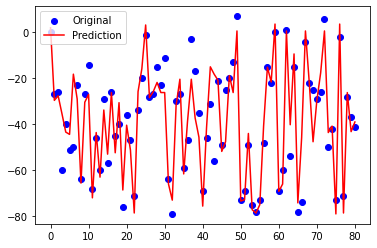

In [17]:
x = np.arange(len(test_target))
plt.scatter(x, test_target, color='blue', 
            label='Original')
plt.plot(x, test_pred, color='red', 
         label='Prediction')
plt.legend()
plt.show()

### Using a different-sized neighborhood with kNN

Training RSME: 8.526933120141974
Training R2 Score: 87.30595018803965
Testing RSME: 10.268025648490804
Testing R2 Score: 81.01887535277126


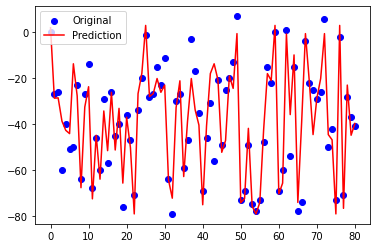

In [18]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(train_features, train_target)

train_pred = knn.predict(train_features)
trainRSME = np.sqrt(mean_squared_error(train_target, 
                                       train_pred))
trainR2 = r2_score(train_target, train_pred) * 100
print(f"Training RSME: {trainRSME}")
print(f"Training R2 Score: {trainR2}")

test_pred = knn.predict(test_features)
testRSME = np.sqrt(mean_squared_error(test_target, 
                                      test_pred))
testR2 = r2_score(test_target, test_pred) * 100
print(f"Testing RSME: {testRSME}")
print(f"Testing R2 Score: {testR2}")

plt.scatter(x, test_target, color='blue', 
            label='Original')
plt.plot(x, test_pred, color='red', 
         label='Prediction')
plt.legend()
plt.show()

Training RSME: 7.239871596978826
Training R2 Score: 90.84883865562644
Testing RSME: 9.51361741524911
Testing R2 Score: 83.70556085749895


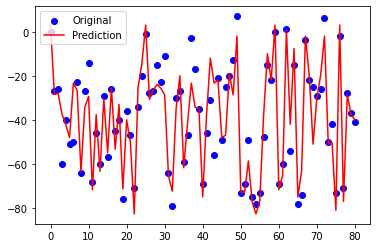

In [19]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(train_features, train_target)

train_pred = knn.predict(train_features)
trainRSME = np.sqrt(mean_squared_error(train_target, 
                                       train_pred))
trainR2 = r2_score(train_target, train_pred) * 100
print(f"Training RSME: {trainRSME}")
print(f"Training R2 Score: {trainR2}")

test_pred = knn.predict(test_features)
testRSME = np.sqrt(mean_squared_error(test_target, 
                                      test_pred))
testR2 = r2_score(test_target, test_pred) * 100
print(f"Testing RSME: {testRSME}")
print(f"Testing R2 Score: {testR2}")

plt.scatter(x, test_target, color='blue', 
            label='Original')
plt.plot(x, test_pred, color='red', 
         label='Prediction')
plt.legend()
plt.show()

### Building and testing using a Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(max_depth = 4, 
                           n_estimators=500)
rf.fit(train_features, train_target)

RandomForestRegressor(max_depth=4, n_estimators=500)

In [22]:
train_pred = rf.predict(train_features)
trainRSME = np.sqrt(mean_squared_error(train_target, 
                                       train_pred))
trainR2 = r2_score(train_target, train_pred) * 100
print(f"Training RSME: {trainRSME}")
print(f"Training R2 Score: {trainR2}")

test_pred = rf.predict(test_features)
testRSME = np.sqrt(mean_squared_error(test_target, 
                                      test_pred))
testR2 = r2_score(test_target, test_pred) * 100
print(f"Testing RSME: {testRSME}")
print(f"Testing R2 Score: {testR2}")

Training RSME: 7.024166548977007
Training R2 Score: 91.3860155018798
Testing RSME: 8.893716635030863
Testing R2 Score: 85.75984790693091


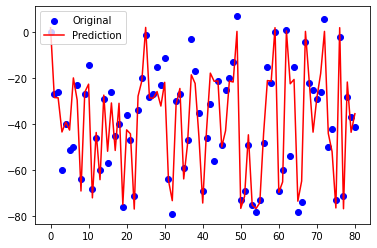

In [23]:
plt.scatter(x, test_target, color='blue', 
            label='Original')
plt.plot(x, test_pred, color='red', 
         label='Prediction')
plt.legend()
plt.show()

### Building and testing an XGBoost Regressor

In [24]:
modules = !pip list
installed = False

for item in modules:
    if ('xgboost' in item):
        print('XGBoost installed: ', item)
        installed = True
        
if not installed:
    print('Installing XGBoost...')
    !pip install xgboost

XGBoost installed:  xgboost                            1.6.2


In [25]:
from xgboost import XGBRegressor
xg = XGBRegressor(max_depth = 3, n_estimators=750, 
                  eta=0.3)
xg.fit(train_features, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=750, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [26]:
train_pred = xg.predict(train_features)
trainRSME = np.sqrt(mean_squared_error(train_target, 
                                       train_pred))
trainR2 = r2_score(train_target, train_pred) * 100
print(f"Training RSME: {trainRSME}")
print(f"Training R2 Score: {trainR2}")

test_pred = xg.predict(test_features)
testRSME = np.sqrt(mean_squared_error(test_target, 
                                      test_pred))
testR2 = r2_score(test_target, test_pred) * 100
print(f"Testing RSME: {testRSME}")
print(f"Testing R2 Score: {testR2}")

Training RSME: 1.2282842929226978
Training R2 Score: 99.73660211630327
Testing RSME: 8.604377627388082
Testing R2 Score: 86.67132506775764


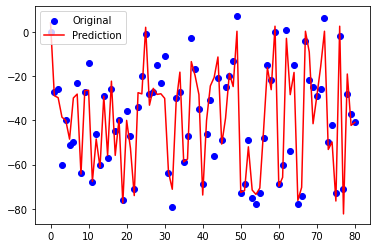

In [27]:
plt.scatter(x, test_target, color='blue', 
            label='Original')
plt.plot(x, test_pred, color='red', 
         label='Prediction')
plt.legend()
plt.show()

### Putting the data in perspective

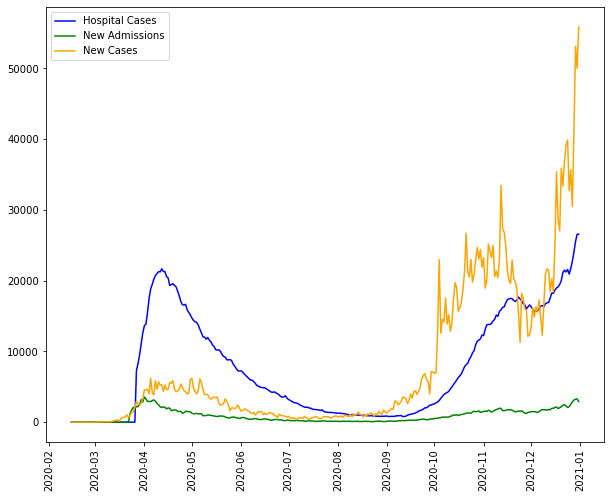

In [28]:
plt.plot(covid_df['date'], 
         covid_df['hospitalCases'].values,
         color='blue', label='Hospital Cases')
plt.plot(covid_df['date'], 
         covid_df['newAdmissions'].values,
         color='green', label='New Admissions')
plt.plot(covid_df['date'], 
         covid_df['newCasesByPublishDate'].values,
         color='orange', label='New Cases')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.legend()
plt.show()

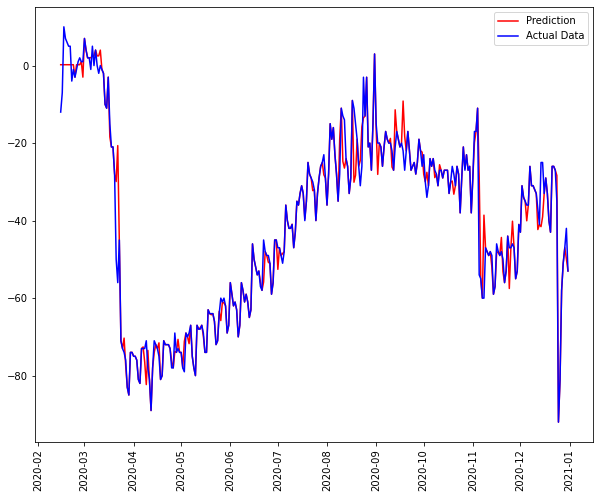

In [29]:
xg_full_pred = xg.predict(covid_df[[
    'hospitalCases',
    'newAdmissions',
    'newCasesByPublishDate']].values)
plt.plot(covid_df['date'], xg_full_pred, 
         color='red', label='Prediction')
plt.plot(covid_df['date'],
        mobility_df['retail_and_recreation'],
        color='blue', label='Actual Data')
plt.xticks(rotation=90)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Predicting new behavior based on the past

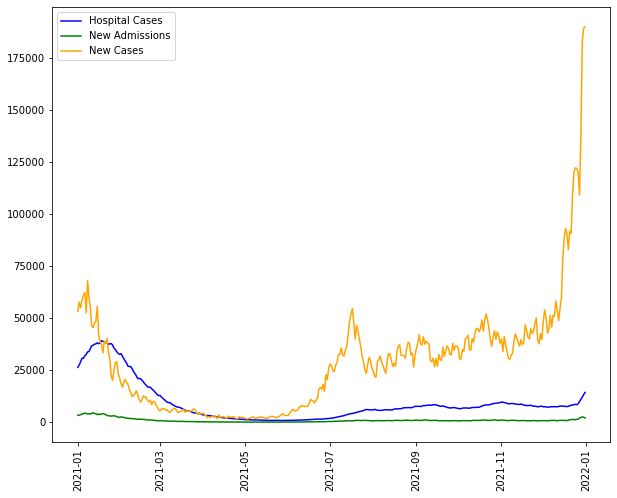

In [30]:
plt.plot(covid_df_2021['date'], 
         covid_df_2021['hospitalCases'].values,
         color='blue', label='Hospital Cases')
plt.plot(covid_df_2021['date'], 
         covid_df_2021['newAdmissions'].values,
         color='green', label='New Admissions')
plt.plot(covid_df_2021['date'], 
         covid_df_2021['newCasesByPublishDate'].values,
         color='orange', label='New Cases')
plt.xticks(rotation=90)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [31]:
mobility_df = pd.read_csv(
    "Region_Mobility_Report_CSVs/" \
    "2021_GB_Region_Mobility_Report.csv")

mobility_df.drop(['country_region_code',
                  'country_region',
                  'sub_region_1',
                  'sub_region_2',
                  'metro_area',
                  'iso_3166_2_code',
                  'census_fips_code',
                  'place_id'],
                 axis='columns',
                 inplace=True)
mobility_df['date'] = pd.to_datetime(mobility_df['date'])
mobility_df.rename(columns={
    'retail_and_recreation_percent_change_from_baseline':
    'retail_and_recreation'}, 
                   inplace=True)

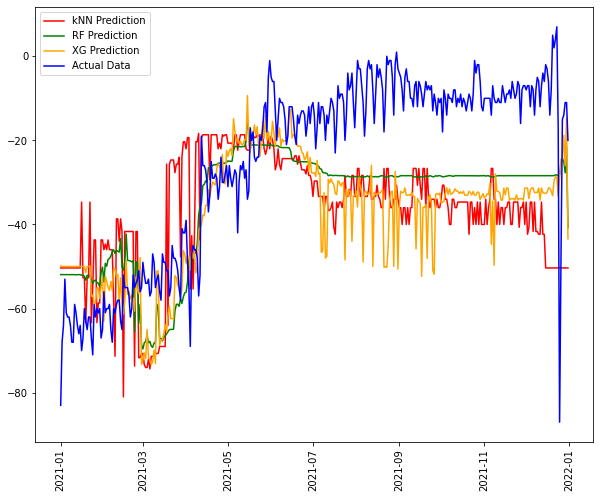

In [32]:
knn_2021_pred = knn.predict(covid_df_2021[[
    'hospitalCases',
    'newAdmissions',
    'newCasesByPublishDate']].values)

rf_2021_pred = rf.predict(covid_df_2021[[
    'hospitalCases',
    'newAdmissions',
    'newCasesByPublishDate']].values)

xg_2021_pred = xg.predict(covid_df_2021[[
    'hospitalCases',
    'newAdmissions',
    'newCasesByPublishDate']].values)

plt.plot(covid_df_2021['date'], 
         knn_2021_pred, 
         color='red', label='kNN Prediction')
plt.plot(covid_df_2021['date'], 
         rf_2021_pred, 
         color='green', label='RF Prediction')
plt.plot(covid_df_2021['date'], 
         xg_2021_pred, 
         color='orange', label='XG Prediction')
plt.plot(covid_df_2021['date'],
        mobility_df.head(365)['retail_and_recreation'],
        color='blue', label='Actual Data')
plt.xticks(rotation=90)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()